In [39]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os
import numpy as np
import sys

In [155]:
!nvidia-smi

Tue Dec 26 08:55:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:07:00.0 Off |                    0 |
| N/A   40C    P0    58W / 400W |  18227MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  Off  | 00000000:0B:00.0 Off |                    0 |
| N/A   

In [156]:
!export CUDA_VISIBLE_DEVICES=0

In [157]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()

print("Is CUDA available:", cuda_available)

# If CUDA is available, you can also check the number of GPUs available and the current active GPU
if cuda_available:
    print("Number of GPUs available:", torch.cuda.device_count())
    print("Current active CUDA Device:", torch.cuda.current_device())
    print("Name of current CUDA Device:", torch.cuda.get_device_name(torch.cuda.current_device()))

# To ensure that your tensors are being created on the GPU, use .


Is CUDA available: True
Number of GPUs available: 8
Current active CUDA Device: 0
Name of current CUDA Device: NVIDIA A100-SXM4-40GB


In [16]:
path = '/apollo/deepnwp/nc/'
ds = xr.open_dataset(path+'deepnwp_2017_04_22_12.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 3)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * time     (time) datetime64[ns] 2017-04-23 2017-04-24 2017-04-25
    height   float64 ...
Data variables:
    tas_gfs  (time, lat, lon) float32 ...
    pr_gfs   (time, lat, lon) float32 ...
    pr_gpcp  (time, lat, lon) float32 ...

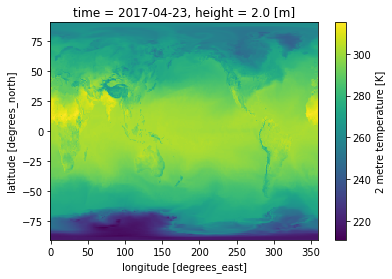

In [17]:
#fig,ax = plt.subplots(ncols=1,nrows=1, subplot_kw={'projection': ccrs.PlateCarree()})
ds.tas_gfs.isel(time=0).plot(vmax=315)#########.plot(ax=ax[0,0])

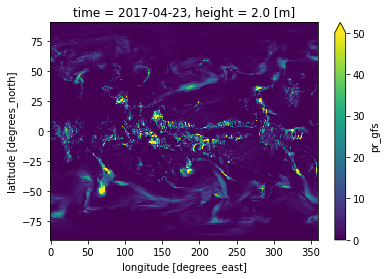

In [18]:
ds.pr_gfs.isel(time=0).plot(vmax=50)

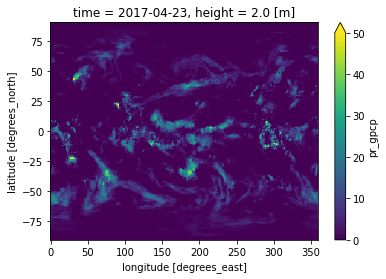

In [19]:
ds.pr_gpcp.isel(time=0).plot(vmax=50)

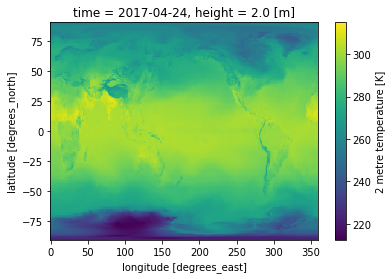

In [95]:
ds.tas_gfs.isel(time=1).plot(vmax=315)

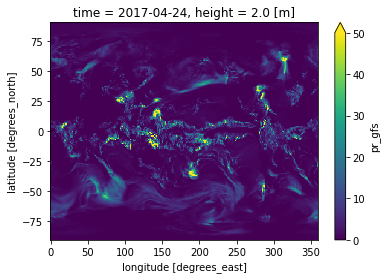

In [7]:
ds.pr_gfs.isel(time=1).plot(vmax=50)

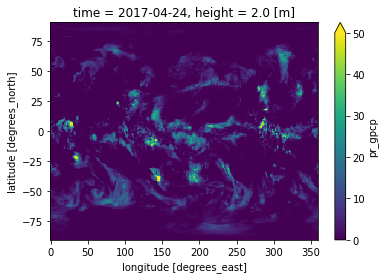

In [8]:
ds.pr_gpcp.isel(time=1).plot(vmax=50)

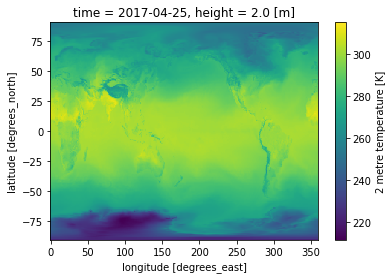

In [9]:
ds.tas_gfs.isel(time=2).plot(vmax=315)

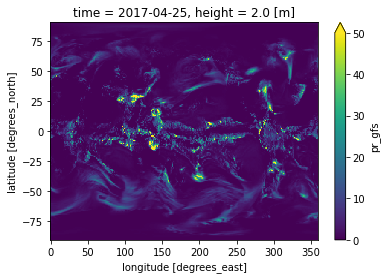

In [10]:
ds.pr_gfs.isel(time=2).plot(vmax=50)

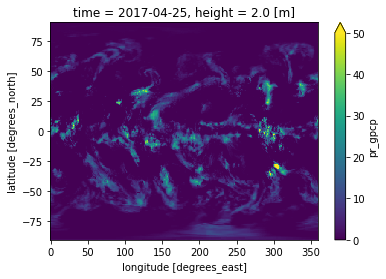

In [11]:
ds.pr_gpcp.isel(time=2).plot(vmax=50)

In [116]:
pr_gfs_max_ = []
tas_gfs_max_ = []
pr_gpcp_max_ = []
path = '/apollo/deepnwp/nc/'
for filename in os.listdir(path):
    if filename.startswith("deepnwp"):
        print(f"Found .nc file: {filename}")
        print(filename)
        ds = xr.open_dataset(path+filename)
        pr_gfs_max_.append(ds.pr_gfs.values.max())
        tas_gfs_max_.append(ds.tas_gfs.values.max())
        pr_gpcp_max_.append(ds.pr_gpcp.values.max())

#     print(filename)
# #    ds = xr.open_dataset(path+'deepnwp_2017_04_22_12.nc')
# #ds

Found .nc file: deepnwp_2017_01_01_00.nc
deepnwp_2017_01_01_00.nc
Found .nc file: deepnwp_2017_01_18_00.nc
deepnwp_2017_01_18_00.nc
Found .nc file: deepnwp_2017_01_18_12.nc
deepnwp_2017_01_18_12.nc
Found .nc file: deepnwp_2017_01_19_00.nc
deepnwp_2017_01_19_00.nc
Found .nc file: deepnwp_2017_01_19_12.nc
deepnwp_2017_01_19_12.nc
Found .nc file: deepnwp_2017_01_20_00.nc
deepnwp_2017_01_20_00.nc
Found .nc file: deepnwp_2017_01_20_12.nc
deepnwp_2017_01_20_12.nc
Found .nc file: deepnwp_2017_01_21_00.nc
deepnwp_2017_01_21_00.nc
Found .nc file: deepnwp_2017_01_21_12.nc
deepnwp_2017_01_21_12.nc
Found .nc file: deepnwp_2017_01_22_00.nc
deepnwp_2017_01_22_00.nc
Found .nc file: deepnwp_2017_01_22_12.nc
deepnwp_2017_01_22_12.nc
Found .nc file: deepnwp_2017_01_23_00.nc
deepnwp_2017_01_23_00.nc
Found .nc file: deepnwp_2017_01_23_12.nc
deepnwp_2017_01_23_12.nc
Found .nc file: deepnwp_2017_01_24_00.nc
deepnwp_2017_01_24_00.nc
Found .nc file: deepnwp_2017_01_24_12.nc
deepnwp_2017_01_24_12.nc
Found .nc 

Found .nc file: deepnwp_2017_02_06_00.nc
deepnwp_2017_02_06_00.nc
Found .nc file: deepnwp_2017_02_06_06.nc
deepnwp_2017_02_06_06.nc
Found .nc file: deepnwp_2017_02_06_12.nc
deepnwp_2017_02_06_12.nc
Found .nc file: deepnwp_2017_02_06_18.nc
deepnwp_2017_02_06_18.nc
Found .nc file: deepnwp_2017_02_07_00.nc
deepnwp_2017_02_07_00.nc
Found .nc file: deepnwp_2017_02_07_06.nc
deepnwp_2017_02_07_06.nc
Found .nc file: deepnwp_2017_02_07_12.nc
deepnwp_2017_02_07_12.nc
Found .nc file: deepnwp_2017_02_07_18.nc
deepnwp_2017_02_07_18.nc
Found .nc file: deepnwp_2017_02_08_00.nc
deepnwp_2017_02_08_00.nc
Found .nc file: deepnwp_2017_02_08_06.nc
deepnwp_2017_02_08_06.nc
Found .nc file: deepnwp_2017_02_08_12.nc
deepnwp_2017_02_08_12.nc
Found .nc file: deepnwp_2017_02_08_18.nc
deepnwp_2017_02_08_18.nc
Found .nc file: deepnwp_2017_02_09_00.nc
deepnwp_2017_02_09_00.nc
Found .nc file: deepnwp_2017_02_09_06.nc
deepnwp_2017_02_09_06.nc
Found .nc file: deepnwp_2017_02_09_12.nc
deepnwp_2017_02_09_12.nc
Found .nc 

Found .nc file: deepnwp_2017_03_15_12.nc
deepnwp_2017_03_15_12.nc
Found .nc file: deepnwp_2017_03_15_18.nc
deepnwp_2017_03_15_18.nc
Found .nc file: deepnwp_2017_03_16_00.nc
deepnwp_2017_03_16_00.nc
Found .nc file: deepnwp_2017_03_16_06.nc
deepnwp_2017_03_16_06.nc
Found .nc file: deepnwp_2017_03_16_12.nc
deepnwp_2017_03_16_12.nc
Found .nc file: deepnwp_2017_03_16_18.nc
deepnwp_2017_03_16_18.nc
Found .nc file: deepnwp_2017_03_17_00.nc
deepnwp_2017_03_17_00.nc
Found .nc file: deepnwp_2017_03_17_06.nc
deepnwp_2017_03_17_06.nc
Found .nc file: deepnwp_2017_03_17_12.nc
deepnwp_2017_03_17_12.nc
Found .nc file: deepnwp_2017_03_17_18.nc
deepnwp_2017_03_17_18.nc
Found .nc file: deepnwp_2017_03_18_00.nc
deepnwp_2017_03_18_00.nc
Found .nc file: deepnwp_2017_03_18_06.nc
deepnwp_2017_03_18_06.nc
Found .nc file: deepnwp_2017_03_18_12.nc
deepnwp_2017_03_18_12.nc
Found .nc file: deepnwp_2017_03_18_18.nc
deepnwp_2017_03_18_18.nc
Found .nc file: deepnwp_2017_03_19_00.nc
deepnwp_2017_03_19_00.nc
Found .nc 

Found .nc file: deepnwp_2017_04_16_12.nc
deepnwp_2017_04_16_12.nc
Found .nc file: deepnwp_2017_04_16_18.nc
deepnwp_2017_04_16_18.nc
Found .nc file: deepnwp_2017_04_17_00.nc
deepnwp_2017_04_17_00.nc
Found .nc file: deepnwp_2017_04_17_06.nc
deepnwp_2017_04_17_06.nc
Found .nc file: deepnwp_2017_04_17_12.nc
deepnwp_2017_04_17_12.nc
Found .nc file: deepnwp_2017_04_17_18.nc
deepnwp_2017_04_17_18.nc
Found .nc file: deepnwp_2017_04_18_00.nc
deepnwp_2017_04_18_00.nc
Found .nc file: deepnwp_2017_04_18_06.nc
deepnwp_2017_04_18_06.nc
Found .nc file: deepnwp_2017_04_18_12.nc
deepnwp_2017_04_18_12.nc
Found .nc file: deepnwp_2017_04_18_18.nc
deepnwp_2017_04_18_18.nc
Found .nc file: deepnwp_2017_04_19_00.nc
deepnwp_2017_04_19_00.nc
Found .nc file: deepnwp_2017_04_19_06.nc
deepnwp_2017_04_19_06.nc
Found .nc file: deepnwp_2017_04_19_12.nc
deepnwp_2017_04_19_12.nc
Found .nc file: deepnwp_2017_04_19_18.nc
deepnwp_2017_04_19_18.nc
Found .nc file: deepnwp_2017_04_20_00.nc
deepnwp_2017_04_20_00.nc
Found .nc 

Found .nc file: deepnwp_2017_05_18_18.nc
deepnwp_2017_05_18_18.nc
Found .nc file: deepnwp_2017_05_19_00.nc
deepnwp_2017_05_19_00.nc
Found .nc file: deepnwp_2017_05_19_06.nc
deepnwp_2017_05_19_06.nc
Found .nc file: deepnwp_2017_05_19_12.nc
deepnwp_2017_05_19_12.nc
Found .nc file: deepnwp_2017_05_19_18.nc
deepnwp_2017_05_19_18.nc
Found .nc file: deepnwp_2017_05_20_00.nc
deepnwp_2017_05_20_00.nc
Found .nc file: deepnwp_2017_05_20_06.nc
deepnwp_2017_05_20_06.nc
Found .nc file: deepnwp_2017_05_20_12.nc
deepnwp_2017_05_20_12.nc
Found .nc file: deepnwp_2017_05_20_18.nc
deepnwp_2017_05_20_18.nc
Found .nc file: deepnwp_2017_05_21_00.nc
deepnwp_2017_05_21_00.nc
Found .nc file: deepnwp_2017_05_21_06.nc
deepnwp_2017_05_21_06.nc
Found .nc file: deepnwp_2017_05_21_12.nc
deepnwp_2017_05_21_12.nc
Found .nc file: deepnwp_2017_05_21_18.nc
deepnwp_2017_05_21_18.nc
Found .nc file: deepnwp_2017_05_22_00.nc
deepnwp_2017_05_22_00.nc
Found .nc file: deepnwp_2017_05_22_06.nc
deepnwp_2017_05_22_06.nc
Found .nc 

Found .nc file: deepnwp_2017_06_20_06.nc
deepnwp_2017_06_20_06.nc
Found .nc file: deepnwp_2017_06_20_12.nc
deepnwp_2017_06_20_12.nc
Found .nc file: deepnwp_2017_06_20_18.nc
deepnwp_2017_06_20_18.nc
Found .nc file: deepnwp_2017_06_21_00.nc
deepnwp_2017_06_21_00.nc
Found .nc file: deepnwp_2017_06_21_06.nc
deepnwp_2017_06_21_06.nc
Found .nc file: deepnwp_2017_06_21_12.nc
deepnwp_2017_06_21_12.nc
Found .nc file: deepnwp_2017_06_21_18.nc
deepnwp_2017_06_21_18.nc
Found .nc file: deepnwp_2017_06_22_00.nc
deepnwp_2017_06_22_00.nc
Found .nc file: deepnwp_2017_06_22_06.nc
deepnwp_2017_06_22_06.nc
Found .nc file: deepnwp_2017_06_22_12.nc
deepnwp_2017_06_22_12.nc
Found .nc file: deepnwp_2017_06_22_18.nc
deepnwp_2017_06_22_18.nc
Found .nc file: deepnwp_2017_06_23_00.nc
deepnwp_2017_06_23_00.nc
Found .nc file: deepnwp_2017_06_23_06.nc
deepnwp_2017_06_23_06.nc
Found .nc file: deepnwp_2017_06_23_12.nc
deepnwp_2017_06_23_12.nc
Found .nc file: deepnwp_2017_06_23_18.nc
deepnwp_2017_06_23_18.nc
Found .nc 

Found .nc file: deepnwp_2017_07_22_00.nc
deepnwp_2017_07_22_00.nc
Found .nc file: deepnwp_2017_07_22_06.nc
deepnwp_2017_07_22_06.nc
Found .nc file: deepnwp_2017_07_22_12.nc
deepnwp_2017_07_22_12.nc
Found .nc file: deepnwp_2017_07_22_18.nc
deepnwp_2017_07_22_18.nc
Found .nc file: deepnwp_2017_07_23_00.nc
deepnwp_2017_07_23_00.nc
Found .nc file: deepnwp_2017_07_23_06.nc
deepnwp_2017_07_23_06.nc
Found .nc file: deepnwp_2017_07_23_12.nc
deepnwp_2017_07_23_12.nc
Found .nc file: deepnwp_2017_07_23_18.nc
deepnwp_2017_07_23_18.nc
Found .nc file: deepnwp_2017_07_24_00.nc
deepnwp_2017_07_24_00.nc
Found .nc file: deepnwp_2017_07_24_06.nc
deepnwp_2017_07_24_06.nc
Found .nc file: deepnwp_2017_07_24_12.nc
deepnwp_2017_07_24_12.nc
Found .nc file: deepnwp_2017_07_24_18.nc
deepnwp_2017_07_24_18.nc
Found .nc file: deepnwp_2017_07_25_00.nc
deepnwp_2017_07_25_00.nc
Found .nc file: deepnwp_2017_07_25_06.nc
deepnwp_2017_07_25_06.nc
Found .nc file: deepnwp_2017_07_25_12.nc
deepnwp_2017_07_25_12.nc
Found .nc 

Found .nc file: deepnwp_2017_08_23_12.nc
deepnwp_2017_08_23_12.nc
Found .nc file: deepnwp_2017_08_23_18.nc
deepnwp_2017_08_23_18.nc
Found .nc file: deepnwp_2017_08_24_00.nc
deepnwp_2017_08_24_00.nc
Found .nc file: deepnwp_2017_08_24_06.nc
deepnwp_2017_08_24_06.nc
Found .nc file: deepnwp_2017_08_24_12.nc
deepnwp_2017_08_24_12.nc
Found .nc file: deepnwp_2017_08_24_18.nc
deepnwp_2017_08_24_18.nc
Found .nc file: deepnwp_2017_08_25_00.nc
deepnwp_2017_08_25_00.nc
Found .nc file: deepnwp_2017_08_25_06.nc
deepnwp_2017_08_25_06.nc
Found .nc file: deepnwp_2017_08_25_12.nc
deepnwp_2017_08_25_12.nc
Found .nc file: deepnwp_2017_08_25_18.nc
deepnwp_2017_08_25_18.nc
Found .nc file: deepnwp_2017_08_26_00.nc
deepnwp_2017_08_26_00.nc
Found .nc file: deepnwp_2017_08_26_06.nc
deepnwp_2017_08_26_06.nc
Found .nc file: deepnwp_2017_08_26_12.nc
deepnwp_2017_08_26_12.nc
Found .nc file: deepnwp_2017_08_26_18.nc
deepnwp_2017_08_26_18.nc
Found .nc file: deepnwp_2017_08_27_00.nc
deepnwp_2017_08_27_00.nc
Found .nc 

Found .nc file: deepnwp_2017_09_25_00.nc
deepnwp_2017_09_25_00.nc
Found .nc file: deepnwp_2017_09_25_06.nc
deepnwp_2017_09_25_06.nc
Found .nc file: deepnwp_2017_09_25_12.nc
deepnwp_2017_09_25_12.nc
Found .nc file: deepnwp_2017_09_25_18.nc
deepnwp_2017_09_25_18.nc
Found .nc file: deepnwp_2017_09_26_00.nc
deepnwp_2017_09_26_00.nc
Found .nc file: deepnwp_2017_09_26_06.nc
deepnwp_2017_09_26_06.nc
Found .nc file: deepnwp_2017_09_26_12.nc
deepnwp_2017_09_26_12.nc
Found .nc file: deepnwp_2017_09_26_18.nc
deepnwp_2017_09_26_18.nc
Found .nc file: deepnwp_2017_09_27_00.nc
deepnwp_2017_09_27_00.nc
Found .nc file: deepnwp_2017_09_27_06.nc
deepnwp_2017_09_27_06.nc
Found .nc file: deepnwp_2017_09_27_12.nc
deepnwp_2017_09_27_12.nc
Found .nc file: deepnwp_2017_09_27_18.nc
deepnwp_2017_09_27_18.nc
Found .nc file: deepnwp_2017_09_28_00.nc
deepnwp_2017_09_28_00.nc
Found .nc file: deepnwp_2017_09_28_06.nc
deepnwp_2017_09_28_06.nc
Found .nc file: deepnwp_2017_09_28_12.nc
deepnwp_2017_09_28_12.nc
Found .nc 

Found .nc file: deepnwp_2017_10_27_06.nc
deepnwp_2017_10_27_06.nc
Found .nc file: deepnwp_2017_10_27_12.nc
deepnwp_2017_10_27_12.nc
Found .nc file: deepnwp_2017_10_27_18.nc
deepnwp_2017_10_27_18.nc
Found .nc file: deepnwp_2017_10_28_00.nc
deepnwp_2017_10_28_00.nc
Found .nc file: deepnwp_2017_10_28_06.nc
deepnwp_2017_10_28_06.nc
Found .nc file: deepnwp_2017_10_28_12.nc
deepnwp_2017_10_28_12.nc
Found .nc file: deepnwp_2017_10_28_18.nc
deepnwp_2017_10_28_18.nc
Found .nc file: deepnwp_2017_10_29_00.nc
deepnwp_2017_10_29_00.nc
Found .nc file: deepnwp_2017_10_29_06.nc
deepnwp_2017_10_29_06.nc
Found .nc file: deepnwp_2017_10_29_12.nc
deepnwp_2017_10_29_12.nc
Found .nc file: deepnwp_2017_10_29_18.nc
deepnwp_2017_10_29_18.nc
Found .nc file: deepnwp_2017_10_30_00.nc
deepnwp_2017_10_30_00.nc
Found .nc file: deepnwp_2017_10_30_06.nc
deepnwp_2017_10_30_06.nc
Found .nc file: deepnwp_2017_10_30_12.nc
deepnwp_2017_10_30_12.nc
Found .nc file: deepnwp_2017_10_30_18.nc
deepnwp_2017_10_30_18.nc
Found .nc 

Found .nc file: deepnwp_2017_11_28_18.nc
deepnwp_2017_11_28_18.nc
Found .nc file: deepnwp_2017_11_29_00.nc
deepnwp_2017_11_29_00.nc
Found .nc file: deepnwp_2017_11_29_06.nc
deepnwp_2017_11_29_06.nc
Found .nc file: deepnwp_2017_11_29_12.nc
deepnwp_2017_11_29_12.nc
Found .nc file: deepnwp_2017_11_29_18.nc
deepnwp_2017_11_29_18.nc
Found .nc file: deepnwp_2017_11_30_00.nc
deepnwp_2017_11_30_00.nc
Found .nc file: deepnwp_2017_11_30_06.nc
deepnwp_2017_11_30_06.nc
Found .nc file: deepnwp_2017_11_30_12.nc
deepnwp_2017_11_30_12.nc
Found .nc file: deepnwp_2017_11_30_18.nc
deepnwp_2017_11_30_18.nc
Found .nc file: deepnwp_2017_12_01_00.nc
deepnwp_2017_12_01_00.nc
Found .nc file: deepnwp_2017_12_01_06.nc
deepnwp_2017_12_01_06.nc
Found .nc file: deepnwp_2017_12_01_12.nc
deepnwp_2017_12_01_12.nc
Found .nc file: deepnwp_2017_12_01_18.nc
deepnwp_2017_12_01_18.nc
Found .nc file: deepnwp_2017_12_02_00.nc
deepnwp_2017_12_02_00.nc
Found .nc file: deepnwp_2017_12_02_06.nc
deepnwp_2017_12_02_06.nc
Found .nc 

Found .nc file: deepnwp_2017_12_31_06.nc
deepnwp_2017_12_31_06.nc
Found .nc file: deepnwp_2017_12_31_12.nc
deepnwp_2017_12_31_12.nc
Found .nc file: deepnwp_2017_12_31_18.nc
deepnwp_2017_12_31_18.nc
Found .nc file: deepnwp_2018_01_01_00.nc
deepnwp_2018_01_01_00.nc
Found .nc file: deepnwp_2018_01_01_06.nc
deepnwp_2018_01_01_06.nc
Found .nc file: deepnwp_2018_01_01_12.nc
deepnwp_2018_01_01_12.nc
Found .nc file: deepnwp_2018_01_01_18.nc
deepnwp_2018_01_01_18.nc
Found .nc file: deepnwp_2018_01_02_00.nc
deepnwp_2018_01_02_00.nc
Found .nc file: deepnwp_2018_01_02_06.nc
deepnwp_2018_01_02_06.nc
Found .nc file: deepnwp_2018_01_02_12.nc
deepnwp_2018_01_02_12.nc
Found .nc file: deepnwp_2018_01_02_18.nc
deepnwp_2018_01_02_18.nc
Found .nc file: deepnwp_2018_01_03_00.nc
deepnwp_2018_01_03_00.nc
Found .nc file: deepnwp_2018_01_03_06.nc
deepnwp_2018_01_03_06.nc
Found .nc file: deepnwp_2018_01_03_12.nc
deepnwp_2018_01_03_12.nc
Found .nc file: deepnwp_2018_01_03_18.nc
deepnwp_2018_01_03_18.nc
Found .nc 

Found .nc file: deepnwp_2018_02_01_12.nc
deepnwp_2018_02_01_12.nc
Found .nc file: deepnwp_2018_02_01_18.nc
deepnwp_2018_02_01_18.nc
Found .nc file: deepnwp_2018_02_02_00.nc
deepnwp_2018_02_02_00.nc
Found .nc file: deepnwp_2018_02_02_06.nc
deepnwp_2018_02_02_06.nc
Found .nc file: deepnwp_2018_02_02_12.nc
deepnwp_2018_02_02_12.nc
Found .nc file: deepnwp_2018_02_02_18.nc
deepnwp_2018_02_02_18.nc
Found .nc file: deepnwp_2018_02_03_00.nc
deepnwp_2018_02_03_00.nc
Found .nc file: deepnwp_2018_02_03_06.nc
deepnwp_2018_02_03_06.nc
Found .nc file: deepnwp_2018_02_03_12.nc
deepnwp_2018_02_03_12.nc
Found .nc file: deepnwp_2018_02_03_18.nc
deepnwp_2018_02_03_18.nc
Found .nc file: deepnwp_2018_02_04_00.nc
deepnwp_2018_02_04_00.nc
Found .nc file: deepnwp_2018_02_04_06.nc
deepnwp_2018_02_04_06.nc
Found .nc file: deepnwp_2018_02_04_12.nc
deepnwp_2018_02_04_12.nc
Found .nc file: deepnwp_2018_02_04_18.nc
deepnwp_2018_02_04_18.nc
Found .nc file: deepnwp_2018_02_05_00.nc
deepnwp_2018_02_05_00.nc
Found .nc 

Found .nc file: deepnwp_2018_03_06_00.nc
deepnwp_2018_03_06_00.nc
Found .nc file: deepnwp_2018_03_06_06.nc
deepnwp_2018_03_06_06.nc
Found .nc file: deepnwp_2018_03_06_12.nc
deepnwp_2018_03_06_12.nc
Found .nc file: deepnwp_2018_03_06_18.nc
deepnwp_2018_03_06_18.nc
Found .nc file: deepnwp_2018_03_07_00.nc
deepnwp_2018_03_07_00.nc
Found .nc file: deepnwp_2018_03_07_06.nc
deepnwp_2018_03_07_06.nc
Found .nc file: deepnwp_2018_03_07_12.nc
deepnwp_2018_03_07_12.nc
Found .nc file: deepnwp_2018_03_07_18.nc
deepnwp_2018_03_07_18.nc
Found .nc file: deepnwp_2018_03_08_00.nc
deepnwp_2018_03_08_00.nc
Found .nc file: deepnwp_2018_03_08_06.nc
deepnwp_2018_03_08_06.nc
Found .nc file: deepnwp_2018_03_08_12.nc
deepnwp_2018_03_08_12.nc
Found .nc file: deepnwp_2018_03_08_18.nc
deepnwp_2018_03_08_18.nc
Found .nc file: deepnwp_2018_03_09_00.nc
deepnwp_2018_03_09_00.nc
Found .nc file: deepnwp_2018_03_09_06.nc
deepnwp_2018_03_09_06.nc
Found .nc file: deepnwp_2018_03_09_12.nc
deepnwp_2018_03_09_12.nc
Found .nc 

Found .nc file: deepnwp_2018_04_07_12.nc
deepnwp_2018_04_07_12.nc
Found .nc file: deepnwp_2018_04_07_18.nc
deepnwp_2018_04_07_18.nc
Found .nc file: deepnwp_2018_04_08_00.nc
deepnwp_2018_04_08_00.nc
Found .nc file: deepnwp_2018_04_08_06.nc
deepnwp_2018_04_08_06.nc
Found .nc file: deepnwp_2018_04_08_12.nc
deepnwp_2018_04_08_12.nc
Found .nc file: deepnwp_2018_04_08_18.nc
deepnwp_2018_04_08_18.nc
Found .nc file: deepnwp_2018_04_09_00.nc
deepnwp_2018_04_09_00.nc
Found .nc file: deepnwp_2018_04_09_06.nc
deepnwp_2018_04_09_06.nc
Found .nc file: deepnwp_2018_04_09_12.nc
deepnwp_2018_04_09_12.nc
Found .nc file: deepnwp_2018_04_09_18.nc
deepnwp_2018_04_09_18.nc
Found .nc file: deepnwp_2018_04_10_00.nc
deepnwp_2018_04_10_00.nc
Found .nc file: deepnwp_2018_04_10_06.nc
deepnwp_2018_04_10_06.nc
Found .nc file: deepnwp_2018_04_10_12.nc
deepnwp_2018_04_10_12.nc
Found .nc file: deepnwp_2018_04_10_18.nc
deepnwp_2018_04_10_18.nc
Found .nc file: deepnwp_2018_04_11_00.nc
deepnwp_2018_04_11_00.nc
Found .nc 

Found .nc file: deepnwp_2018_05_10_00.nc
deepnwp_2018_05_10_00.nc
Found .nc file: deepnwp_2018_05_10_06.nc
deepnwp_2018_05_10_06.nc
Found .nc file: deepnwp_2018_05_10_12.nc
deepnwp_2018_05_10_12.nc
Found .nc file: deepnwp_2018_05_10_18.nc
deepnwp_2018_05_10_18.nc
Found .nc file: deepnwp_2018_05_11_00.nc
deepnwp_2018_05_11_00.nc
Found .nc file: deepnwp_2018_05_11_06.nc
deepnwp_2018_05_11_06.nc
Found .nc file: deepnwp_2018_05_11_12.nc
deepnwp_2018_05_11_12.nc
Found .nc file: deepnwp_2018_05_11_18.nc
deepnwp_2018_05_11_18.nc
Found .nc file: deepnwp_2018_05_12_00.nc
deepnwp_2018_05_12_00.nc
Found .nc file: deepnwp_2018_05_12_06.nc
deepnwp_2018_05_12_06.nc
Found .nc file: deepnwp_2018_05_12_12.nc
deepnwp_2018_05_12_12.nc
Found .nc file: deepnwp_2018_05_12_18.nc
deepnwp_2018_05_12_18.nc
Found .nc file: deepnwp_2018_05_13_00.nc
deepnwp_2018_05_13_00.nc
Found .nc file: deepnwp_2018_05_13_06.nc
deepnwp_2018_05_13_06.nc
Found .nc file: deepnwp_2018_05_13_12.nc
deepnwp_2018_05_13_12.nc
Found .nc 

Found .nc file: deepnwp_2018_06_11_06.nc
deepnwp_2018_06_11_06.nc
Found .nc file: deepnwp_2018_06_11_12.nc
deepnwp_2018_06_11_12.nc
Found .nc file: deepnwp_2018_06_11_18.nc
deepnwp_2018_06_11_18.nc
Found .nc file: deepnwp_2018_06_12_00.nc
deepnwp_2018_06_12_00.nc
Found .nc file: deepnwp_2018_06_12_06.nc
deepnwp_2018_06_12_06.nc
Found .nc file: deepnwp_2018_06_12_12.nc
deepnwp_2018_06_12_12.nc
Found .nc file: deepnwp_2018_06_12_18.nc
deepnwp_2018_06_12_18.nc
Found .nc file: deepnwp_2018_06_13_00.nc
deepnwp_2018_06_13_00.nc
Found .nc file: deepnwp_2018_06_13_06.nc
deepnwp_2018_06_13_06.nc
Found .nc file: deepnwp_2018_06_13_12.nc
deepnwp_2018_06_13_12.nc
Found .nc file: deepnwp_2018_06_13_18.nc
deepnwp_2018_06_13_18.nc
Found .nc file: deepnwp_2018_06_14_00.nc
deepnwp_2018_06_14_00.nc
Found .nc file: deepnwp_2018_06_14_06.nc
deepnwp_2018_06_14_06.nc
Found .nc file: deepnwp_2018_06_14_12.nc
deepnwp_2018_06_14_12.nc
Found .nc file: deepnwp_2018_06_14_18.nc
deepnwp_2018_06_14_18.nc
Found .nc 

Found .nc file: deepnwp_2018_07_13_18.nc
deepnwp_2018_07_13_18.nc
Found .nc file: deepnwp_2018_07_14_00.nc
deepnwp_2018_07_14_00.nc
Found .nc file: deepnwp_2018_07_14_06.nc
deepnwp_2018_07_14_06.nc
Found .nc file: deepnwp_2018_07_14_12.nc
deepnwp_2018_07_14_12.nc
Found .nc file: deepnwp_2018_07_14_18.nc
deepnwp_2018_07_14_18.nc
Found .nc file: deepnwp_2018_07_15_00.nc
deepnwp_2018_07_15_00.nc
Found .nc file: deepnwp_2018_07_15_06.nc
deepnwp_2018_07_15_06.nc
Found .nc file: deepnwp_2018_07_15_12.nc
deepnwp_2018_07_15_12.nc
Found .nc file: deepnwp_2018_07_15_18.nc
deepnwp_2018_07_15_18.nc
Found .nc file: deepnwp_2018_07_16_00.nc
deepnwp_2018_07_16_00.nc
Found .nc file: deepnwp_2018_07_16_06.nc
deepnwp_2018_07_16_06.nc
Found .nc file: deepnwp_2018_07_16_12.nc
deepnwp_2018_07_16_12.nc
Found .nc file: deepnwp_2018_07_16_18.nc
deepnwp_2018_07_16_18.nc
Found .nc file: deepnwp_2018_07_17_00.nc
deepnwp_2018_07_17_00.nc
Found .nc file: deepnwp_2018_07_17_06.nc
deepnwp_2018_07_17_06.nc
Found .nc 

Found .nc file: deepnwp_2018_08_15_06.nc
deepnwp_2018_08_15_06.nc
Found .nc file: deepnwp_2018_08_15_12.nc
deepnwp_2018_08_15_12.nc
Found .nc file: deepnwp_2018_08_15_18.nc
deepnwp_2018_08_15_18.nc
Found .nc file: deepnwp_2018_08_16_00.nc
deepnwp_2018_08_16_00.nc
Found .nc file: deepnwp_2018_08_16_06.nc
deepnwp_2018_08_16_06.nc
Found .nc file: deepnwp_2018_08_16_12.nc
deepnwp_2018_08_16_12.nc
Found .nc file: deepnwp_2018_08_16_18.nc
deepnwp_2018_08_16_18.nc
Found .nc file: deepnwp_2018_08_17_00.nc
deepnwp_2018_08_17_00.nc
Found .nc file: deepnwp_2018_08_17_06.nc
deepnwp_2018_08_17_06.nc
Found .nc file: deepnwp_2018_08_17_12.nc
deepnwp_2018_08_17_12.nc
Found .nc file: deepnwp_2018_08_17_18.nc
deepnwp_2018_08_17_18.nc
Found .nc file: deepnwp_2018_08_18_00.nc
deepnwp_2018_08_18_00.nc
Found .nc file: deepnwp_2018_08_18_06.nc
deepnwp_2018_08_18_06.nc
Found .nc file: deepnwp_2018_08_18_12.nc
deepnwp_2018_08_18_12.nc
Found .nc file: deepnwp_2018_08_18_18.nc
deepnwp_2018_08_18_18.nc
Found .nc 

Found .nc file: deepnwp_2018_09_16_18.nc
deepnwp_2018_09_16_18.nc
Found .nc file: deepnwp_2018_09_17_00.nc
deepnwp_2018_09_17_00.nc
Found .nc file: deepnwp_2018_09_17_06.nc
deepnwp_2018_09_17_06.nc
Found .nc file: deepnwp_2018_09_17_12.nc
deepnwp_2018_09_17_12.nc
Found .nc file: deepnwp_2018_09_17_18.nc
deepnwp_2018_09_17_18.nc
Found .nc file: deepnwp_2018_09_18_00.nc
deepnwp_2018_09_18_00.nc
Found .nc file: deepnwp_2018_09_18_06.nc
deepnwp_2018_09_18_06.nc
Found .nc file: deepnwp_2018_09_18_12.nc
deepnwp_2018_09_18_12.nc
Found .nc file: deepnwp_2018_09_18_18.nc
deepnwp_2018_09_18_18.nc
Found .nc file: deepnwp_2018_09_19_00.nc
deepnwp_2018_09_19_00.nc
Found .nc file: deepnwp_2018_09_19_06.nc
deepnwp_2018_09_19_06.nc
Found .nc file: deepnwp_2018_09_19_12.nc
deepnwp_2018_09_19_12.nc
Found .nc file: deepnwp_2018_09_19_18.nc
deepnwp_2018_09_19_18.nc
Found .nc file: deepnwp_2018_09_20_00.nc
deepnwp_2018_09_20_00.nc
Found .nc file: deepnwp_2018_09_20_06.nc
deepnwp_2018_09_20_06.nc
Found .nc 

Found .nc file: deepnwp_2018_10_19_06.nc
deepnwp_2018_10_19_06.nc
Found .nc file: deepnwp_2018_10_19_12.nc
deepnwp_2018_10_19_12.nc
Found .nc file: deepnwp_2018_10_19_18.nc
deepnwp_2018_10_19_18.nc
Found .nc file: deepnwp_2018_10_20_00.nc
deepnwp_2018_10_20_00.nc
Found .nc file: deepnwp_2018_10_20_06.nc
deepnwp_2018_10_20_06.nc
Found .nc file: deepnwp_2018_10_20_12.nc
deepnwp_2018_10_20_12.nc
Found .nc file: deepnwp_2018_10_20_18.nc
deepnwp_2018_10_20_18.nc
Found .nc file: deepnwp_2018_10_21_00.nc
deepnwp_2018_10_21_00.nc
Found .nc file: deepnwp_2018_10_21_06.nc
deepnwp_2018_10_21_06.nc
Found .nc file: deepnwp_2018_10_21_12.nc
deepnwp_2018_10_21_12.nc
Found .nc file: deepnwp_2018_10_21_18.nc
deepnwp_2018_10_21_18.nc
Found .nc file: deepnwp_2018_10_22_00.nc
deepnwp_2018_10_22_00.nc
Found .nc file: deepnwp_2018_10_22_06.nc
deepnwp_2018_10_22_06.nc
Found .nc file: deepnwp_2018_10_22_12.nc
deepnwp_2018_10_22_12.nc
Found .nc file: deepnwp_2018_10_22_18.nc
deepnwp_2018_10_22_18.nc
Found .nc 

In [117]:
pr_gfs_max = np.max(np.array(pr_gfs_max_))
tas_gfs_max = np.max(np.array(tas_gfs_max_))
pr_gpcp_max = np.max(np.array(pr_gpcp_max_))
print(pr_gfs_max, tas_gfs_max, pr_gpcp_max)

841.73334 322.4 175.41191


It can be seen from above that although we have taken the sum of 6 hourly values, we were supposed to take the average, only then would it be comparable to GPCP -- this is not confirmed, it has to be checked

In [118]:
class _BaseRemap(object):
    """
    Base class for remappers. Implements basic functions.
    """

    def __init__(self, path_to_remapper=None):
        if path_to_remapper is None:
            self.path_to_remapper = os.path.dirname(sys.executable)
        else:
            self.path_to_remapper = path_to_remapper
        pass

    def remap(self, input_file, output_file):
        """
        Forward mapping operation. Must be defined in subclasses.
        """
        pass

    def inverse_remap(self, input_file, output_file):
        """
        Inverse mapping operation. Must be defined in subclasses.
        """
        pass
    
#
# Copyright (c) 2019 Jonathan Weyn <jweyn@uw.edu>
#
# See the file LICENSE for your rights.
#

"""
Tools for re-mapping on cubed-sphere coordinates.
"""

import numpy as np
import pandas as pd
import xarray as xr
import os
import subprocess
import warnings
# from .base import _BaseRemap


def to_chunked_dataset(ds, chunking):
    """
    Create a chunked copy of a Dataset with proper encoding for netCDF export.

    :param ds: xarray.Dataset
    :param chunking: dict: chunking dictionary as passed to xarray.Dataset.chunk()
    :return: xarray.Dataset: chunked copy of ds with proper encoding
    """
    chunk_dict = dict(ds.dims)
    chunk_dict.update(chunking)
    ds_new = ds.chunk(chunk_dict)
    for var in ds_new.data_vars:
        ds_new[var].encoding['contiguous'] = False
        ds_new[var].encoding['original_shape'] = ds_new[var].shape
        ds_new[var].encoding['chunksizes'] = tuple([c[0] for c in ds_new[var].chunks])
    return ds_new


class CubeSphereRemap(_BaseRemap):
    """
    Implement tools for remapping to and from a cubed sphere using TempestRemap executables.
    """

    def __init__(self, path_to_remapper=None, to_netcdf4=True, verbose=True):
        """
        Initialize a CubeSphereRemap object.

        :param path_to_remapper: str: path to the TempestRemap executables
        :param to_netcdf4: bool: if True, also use 'ncks' command to convert remapped files to netCDF4
        :param verbose: bool: print commands and progress
        """
        super(CubeSphereRemap, self).__init__(path_to_remapper=path_to_remapper)
        self.remapper = os.path.join(self.path_to_remapper, 'ApplyOfflineMap')
        self.map = None
        self.inverse_map = None
        self.to_netcdf4 = to_netcdf4
        self.verbose = verbose
        self._lat = None
        self._lon = None
        self._res = None
        self._map_exists = False
        self._inverse_map_exists = False

    def assign_maps(self, map_name=None, inverse_map_name=None):
        """
        Point to either or both of existing map conversion files for TempestRemap.

        :param map_name: str: path to forward remapping map
        :param inverse_map_name: str: path to inverse remapping map
        """
        if map_name is not None:
            self.map = map_name
            self._map_exists = True
        if inverse_map_name is not None:
            self.inverse_map = inverse_map_name
            self._inverse_map_exists = True

    def generate_offline_maps(self, lat, lon, res, map_name=None, inverse_map_name=None, inverse_lat=False,
                              remove_meshes=True, in_np=1):
        """
        Generate offline maps for cubed sphere remapping.

        :param lat: int: number of points in the latitude dimension
        :param lon: int: number of points in the longitude dimension
        :param res: int: number of points on a side of each cube face
        :param map_name: str: file name of the forward map
        :param inverse_map_name: str: file name of the inverse map
        :param inverse_lat: if True, then the latitudes in the data file are monotonically decreasing
        :param remove_meshes: if True, remove the temporary meshes generated while making the offline maps
        :param in_np: int: order of transformation. Should be int in range 1 to 4.
        :return:
        """
        assert int(lat) > 0
        assert int(lon) > 0
        assert int(res) > 0
        assert 1 <= int(in_np) <= 4
        self._lat = lat
        self._lon = lon
        self._res = res
        if map_name is None:
            self.map = 'map_LL%dx%d_CS%d.nc' % (self._lat, self._lon, self._res)
        else:
            self.map = map_name
        if inverse_map_name is None:
            self.inverse_map = 'map_CS%d_LL%dx%d.nc' % (self._res, self._lat, self._lon)
        else:
            self.inverse_map = None

        if self.verbose:
            print('CubeSphereRemap: generating offline forward map...')
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateRLLMesh'),
                   '--lat', str(self._lat), '--lon', str(self._lon), '--file', 'outLL.g']
            if inverse_lat:
                cmd = cmd + ['--lat_begin', '90', '--lat_end', '-90']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the lat-lon mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateCSMesh'),
                   '--res', str(self._res), '--file', 'outCS.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the cube sphere mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOverlapMesh'),
                   '--a', 'outLL.g', '--b', 'outCS.g', '--out', 'ov_LL_CS.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the overlap mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOfflineMap'),
                   '--in_mesh', 'outLL.g', '--out_mesh', 'outCS.g', '--ov_mesh', 'ov_LL_CS.g',
                   '--in_np', str(in_np), '--in_type', 'FV', '--out_type', 'FV', '--out_map', self.map]
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the offline map.')
            print(e.output)
            raise
        self._map_exists = True

        print('CubeSphereRemap: generating offline inverse map...')
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOverlapMesh'),
                   '--a', 'outCS.g', '--b', 'outLL.g', '--out', 'ov_CS_LL.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the overlap mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOfflineMap'),
                   '--in_mesh', 'outCS.g', '--out_mesh', 'outLL.g', '--ov_mesh', 'ov_CS_LL.g',
                   '--in_np', str(in_np), '--in_type', 'FV', '--out_type', 'FV', '--out_map', self.inverse_map]
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the offline map.')
            print(e.output)
            raise

        if remove_meshes:
            for f in ['outLL.g', 'outCS.g', 'ov_LL_CS.g', 'ov_CS_LL.g']:
                os.remove(f)

        self._inverse_map_exists = True
        if self.verbose:
            print('CubeSphereRemap: successfully generated offline maps (%s, %s)' % (self.map, self.inverse_map))

    def generate_offline_maps_from_file(self, in_file, res, map_name=None, inverse_map_name=None,
                                        remove_meshes=True, in_np=1):
        """
        Generate offline maps for cubed sphere remapping, using a netCDF file name to generate the lat-lon grid.
        Requires most recent version of TempestRemap.

        :param in_file: str: name of input netCDF file for latitude/longitude coordinates
        :param res: int: number of points on a side of each cube face
        :param map_name: str: file name of the forward map
        :param inverse_map_name: str: file name of the inverse map
        :param remove_meshes: if True, remove the temporary meshes generated while making the offline maps
        :param in_np: int: order of transformation. Should be int in range 1 to 4.
        :return:
        """
        assert int(res) > 0
        assert 1 <= int(in_np) <= 4
        self._res = res

        ds = xr.open_dataset(in_file)
        for file_lon in ['longitude', 'long', 'lon', None]:
            if file_lon in ds.dims:
                break
        for file_lat in ['latitude', 'lat', None]:
            if file_lat in ds.dims:
                break
        if file_lon is None or file_lat is None:
            raise ValueError("cannot find standard names for latitude and longitude coordinates. Found %s" %
                             list(ds.dims.keys()))
        self._lat = ds.dims[file_lat]
        self._lon = ds.dims[file_lon]
        ds.close()

        if map_name is None:
            self.map = 'map_LL%dx%d_CS%d.nc' % (self._lat, self._lon, self._res)
        else:
            self.map = map_name
        if inverse_map_name is None:
            self.inverse_map = 'map_CS%d_LL%dx%d.nc' % (self._res, self._lat, self._lon)
        else:
            self.inverse_map = None

        if self.verbose:
            print('CubeSphereRemap: generating offline forward map...')
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateRLLMesh'),
                   '--in_file', in_file, '--in_file_lat', file_lat, '--in_file_lon', file_lon, '--file', 'outLL.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the lat-lon mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateCSMesh'),
                   '--res', str(self._res), '--file', 'outCS.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the cube sphere mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOverlapMesh'),
                   '--a', 'outLL.g', '--b', 'outCS.g', '--out', 'ov_LL_CS.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the overlap mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOfflineMap'),
                   '--in_mesh', 'outLL.g', '--out_mesh', 'outCS.g', '--ov_mesh', 'ov_LL_CS.g',
                   '--in_np', str(in_np), '--in_type', 'FV', '--out_type', 'FV', '--out_map', self.map]
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the offline map.')
            print(e.output)
            raise
        self._map_exists = True

        print('CubeSphereRemap: generating offline inverse map...')
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOverlapMesh'),
                   '--a', 'outCS.g', '--b', 'outLL.g', '--out', 'ov_CS_LL.g']
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the overlap mesh.')
            print(e.output)
            raise
        try:
            cmd = [os.path.join(self.path_to_remapper, 'GenerateOfflineMap'),
                   '--in_mesh', 'outCS.g', '--out_mesh', 'outLL.g', '--ov_mesh', 'ov_CS_LL.g',
                   '--in_np', str(in_np), '--in_type', 'FV', '--out_type', 'FV', '--out_map', self.inverse_map]
            if self.to_netcdf4:
                cmd = cmd + ['--out_format', 'Netcdf4']
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while generating the offline map.')
            print(e.output)
            raise

        if remove_meshes:
            for f in ['outLL.g', 'outCS.g', 'ov_LL_CS.g', 'ov_CS_LL.g']:
                os.remove(f)

        self._inverse_map_exists = True
        if self.verbose:
            print('CubeSphereRemap: successfully generated offline maps (%s, %s)' % (self.map, self.inverse_map))

    def remap(self, input_file, output_file, *args):
        """
        Apply the forward remapping to data in an input_file, saved to output_file.

        :param input_file: str: path to input data file
        :param output_file: str: path to output data file
        :param args: str: other string arguments passed to the ApplyOfflineMap function
        """
        if not self._map_exists:
            raise ValueError("No forward map has been defined or generated; use 'generate_offline_maps' or "
                             "'assign_maps' functions first")
        elif not(os.path.exists(self.map)):
            raise FileNotFoundError(self.map)
        if self.verbose:
            print('CubeSphereRemap: applying forward map...')

        try:
            cmd = [os.path.join(self.path_to_remapper, 'ApplyOfflineMap'),
                   '--in_data', input_file, '--out_data', output_file, '--map', self.map] + list(args)
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while applying the offline map.')
            print(e.output)
            raise

        if self.verbose:
            print('CubeSphereRemap: successfully remapped data into %s' % output_file)

    def inverse_remap(self, input_file, output_file, *args):
        """
        Apply the forward remapping to data in an input_file, saved to output_file.

        :param input_file: str: path to input data file
        :param output_file: str: path to output data file
        :param args: str: other string arguments passed to the ApplyOfflineMap function
        """
        if not self._inverse_map_exists:
            raise ValueError("No inverse map has been defined or generated; use 'generate_offline_maps' or "
                             "'assign_maps' functions first")
        elif not (os.path.exists(self.inverse_map)):
            raise FileNotFoundError(self.inverse_map)
        if self.verbose:
            print('CubeSphereRemap: applying inverse map...')

        try:
            cmd = [os.path.join(self.path_to_remapper, 'ApplyOfflineMap'),
                   '--in_data', input_file, '--out_data', output_file, '--map', self.inverse_map] + list(args)
            if self.verbose:
                print(' '.join(cmd))
            subprocess.check_output(cmd)
        except subprocess.CalledProcessError as e:
            print('An error occurred while applying the offline map.')
            print(e.output)
            raise

        if self.verbose:
            print('CubeSphereRemap: successfully inverse remapped data into %s' % output_file)

    def convert_to_faces(self, input_file, output_file, coord_file=None, chunking=None):
        """
        Convert a file in cubed-sphere coordinates to contain dimensions for the face number and height/width of each
        of the six cube faces. Very useful for applying convolutions on the faces.

        :param input_file: str: input data file
        :param output_file: str: output data file
        :param coord_file: str: if not None, use this file to fill in missing coordinates that may have been removed
            by the remap() process
        :param chunking: dict: if provided, save the netCDF with this chunking ({dim: chunksize} pairs)
        :return xarray.Dataset: new Dataset object
        """
        # Open the dataset to convert
        ds = xr.open_dataset(input_file)
        if self.verbose:
            print('CubeSphereRemap.convert_to_faces: loading data to memory...')
        ds.load()

        # First, assign any coordinates missing from the input file from the coordinate file, if provided.
        if coord_file is not None:
            ds_coord = xr.open_dataset(coord_file)
            missing_coordinates = [c for c in ds.dims.keys() if (c not in ds.coords.keys() and c != 'ncol')]
            for coord in missing_coordinates:
                if coord not in ds_coord.coords.keys():
                    warnings.warn("coordinate '%s' missing in coordinate file; omitting" % coord)
                    continue
                ds = ds.assign_coords(**{coord: ds_coord.coords[coord]})

        # Create a multi-index dimension
        n_width = int(np.sqrt(ds.dims['ncol'] // 6))
        face_index = pd.MultiIndex.from_product((range(6), range(n_width), range(n_width)),
                                                names=('face', 'height', 'width'))

        # Assign the new coordinate and transpose
        new_dims = tuple([d for d in ds.dims.keys() if d != 'ncol']) + ('face', 'height', 'width')
        if self.verbose:
            print('CubeSphereRemap.convert_to_faces: assigning new coordinates to dataset')
        ds_new = ds.assign_coords(ncol=face_index).unstack('ncol').transpose(*new_dims)

        # Export to a new file
        if self.verbose:
            print('CubeSphereRemap.convert_to_faces: exporting data to file %s...' % output_file)
        if chunking is not None:
            ds_new = to_chunked_dataset(ds_new, chunking)
        ds_new.to_netcdf(output_file)

        if self.verbose:
            print('CubeSphereRemap.convert_to_faces: successfully exported reformatted data')
        return ds_new

    def convert_from_faces(self, input_file, output_file, chunking=None):
        """
        Revert a file containing height, width, face dimensions into the default 'ncol' dimension so that it can be
        inverse remapped by the remapper.

        :param input_file: str: input data file
        :param output_file: str: output data file
        :param chunking: dict: if provided, save the netCDF with this chunking ({dim: chunksize} pairs)
        :return xarray.Dataset: new Dataset object
        """
        # Open the dataset to convert
        ds = xr.open_dataset(input_file)
        if self.verbose:
            print('CubeSphereRemap.convert_from_faces: loading data to memory...')
        ds.load()

        # Transpose the face dimension and stack the face, height, width
        fhw = ('face', 'height', 'width')
        new_dims = tuple([d for d in ds.dims.keys() if d not in fhw]) + fhw
        print('CubeSphereRemap: assigning new coordinates to dataset')
        ds_new = ds.transpose(*new_dims).stack(ncol=fhw).reset_index('ncol')

        # Export to new file
        if self.verbose:
            print('CubeSphereRemap.convert_from_faces: exporting data to file %s...' % output_file)
        if chunking is not None:
            ds_new = to_chunked_dataset(ds_new, chunking)
        ds_new.to_netcdf(output_file)

        if self.verbose:
            print('CubeSphereRemap.convert_from_faces: successfully exported reformatted data')
        return ds_new

In [119]:
# remapper = CubeSphereRemap(path_to_remapper='/opt/conda/bin/')
# remapper.generate_offline_maps(lat, lon, res)
input_file = path+'deepnwp_2017_04_22_12.nc'
output_file = path+'deepnwp_2017_04_22_12_cs.nc'
!rm -rf {output_file}  temp.nc
csr = CubeSphereRemap(path_to_remapper='/opt/conda/bin/')
csr.generate_offline_maps(lat=181, lon=360, res=256, inverse_lat=True)
csr.remap(input_file, 'temp.nc',)
csr.convert_to_faces('temp.nc', 
                     output_file,
                     coord_file=input_file)
ds_remap = xr.open_dataset(output_file)
ds_remap

CubeSphereRemap: generating offline forward map...
/opt/conda/bin/GenerateRLLMesh --lat 181 --lon 360 --file outLL.g --lat_begin 90 --lat_end -90 --out_format Netcdf4
/opt/conda/bin/GenerateCSMesh --res 256 --file outCS.g --out_format Netcdf4
/opt/conda/bin/GenerateOverlapMesh --a outLL.g --b outCS.g --out ov_LL_CS.g --out_format Netcdf4
/opt/conda/bin/GenerateOfflineMap --in_mesh outLL.g --out_mesh outCS.g --ov_mesh ov_LL_CS.g --in_np 1 --in_type FV --out_type FV --out_map map_LL181x360_CS256.nc --out_format Netcdf4
CubeSphereRemap: generating offline inverse map...
/opt/conda/bin/GenerateOverlapMesh --a outCS.g --b outLL.g --out ov_CS_LL.g --out_format Netcdf4
/opt/conda/bin/GenerateOfflineMap --in_mesh outCS.g --out_mesh outLL.g --ov_mesh ov_CS_LL.g --in_np 1 --in_type FV --out_type FV --out_map map_CS256_LL181x360.nc --out_format Netcdf4
CubeSphereRemap: successfully generated offline maps (map_LL181x360_CS256.nc, map_CS256_LL181x360.nc)
CubeSphereRemap: applying forward map...
/op

<xarray.Dataset>
Dimensions:  (face: 6, height: 256, width: 256, time: 3)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5
  * height   (height) int64 0 1 2 3 4 5 6 7 ... 248 249 250 251 252 253 254 255
  * width    (width) int64 0 1 2 3 4 5 6 7 8 ... 248 249 250 251 252 253 254 255
  * time     (time) datetime64[ns] 2017-04-23 2017-04-24 2017-04-25
Data variables:
    lon      (face, height, width) float64 ...
    lat      (face, height, width) float64 ...
    tas_gfs  (time, face, height, width) float32 ...
    pr_gfs   (time, face, height, width) float32 ...
    pr_gpcp  (time, face, height, width) float32 ...

In [127]:
input_file = path+'deepnwp_2017_04_22_12.nc'
output_file = input_file[:-3]+'_cs.nc' #path+'deepnwp_2017_04_22_12_cs.nc'
!rm -rf {output_file}  temp.nc

csr.remap(input_file, 'temp.nc',)
csr.convert_to_faces('temp.nc', 
                     output_file,
                     coord_file=input_file)
ds_remap = xr.open_dataset(output_file)
print(ds_remap.tas_gfs.values.shape, ds_remap.pr_gfs.values.shape, ds_remap.pr_gpcp.values.shape) 

CubeSphereRemap: applying forward map...
/opt/conda/bin/ApplyOfflineMap --in_data /apollo/deepnwp/nc/deepnwp_2017_04_22_12.nc --out_data temp.nc --map map_LL181x360_CS256.nc
CubeSphereRemap: successfully remapped data into temp.nc
CubeSphereRemap.convert_to_faces: loading data to memory...
CubeSphereRemap.convert_to_faces: assigning new coordinates to dataset
CubeSphereRemap.convert_to_faces: exporting data to file /apollo/deepnwp/nc/deepnwp_2017_04_22_12_cs.nc...
CubeSphereRemap.convert_to_faces: successfully exported reformatted data
(3, 6, 256, 256) (3, 6, 256, 256) (3, 6, 256, 256)


In [126]:
print(ds_remap.tas_gfs.values.shape, ds_remap.pr_gfs.values.shape, ds_remap.pr_gpcp.values.shape) 

(3, 6, 256, 256) (3, 6, 256, 256) (3, 6, 256, 256)


In [55]:
input_file = path+'deepnwp_2017_04_22_12_cs.nc'
output_file = path+'deepnwp_2017_04_22_12_ics.nc'
!rm -rf temp.nc {output_file}
csr.convert_from_faces(input_file, 'temp.nc')
csr.inverse_remap('temp.nc', output_file)

CubeSphereRemap.convert_from_faces: loading data to memory...
CubeSphereRemap: assigning new coordinates to dataset
CubeSphereRemap.convert_from_faces: exporting data to file temp.nc...
CubeSphereRemap.convert_from_faces: successfully exported reformatted data
CubeSphereRemap: applying inverse map...
/opt/conda/bin/ApplyOfflineMap --in_data temp.nc --out_data /apollo/deepnwp/nc/deepnwp_2017_04_22_12_ics.nc --map map_CS256_LL181x360.nc
CubeSphereRemap: successfully inverse remapped data into /apollo/deepnwp/nc/deepnwp_2017_04_22_12_ics.nc


In [56]:
ds_iremap = xr.open_dataset(output_file)
ds_iremap

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 3)
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 89.5 88.51 87.51 86.52 ... -86.52 -87.51 -88.51 -89.5
  * time     (time) datetime64[ns] 2017-04-23 2017-04-24 2017-04-25
    height   (lat, lon) float32 ...
Data variables:
    tas_gfs  (time, lat, lon) float32 ...
    pr_gfs   (time, lat, lon) float32 ...
    pr_gpcp  (time, lat, lon) float32 ...
    face     (lat, lon) float32 ...
    width    (lat, lon) float32 ...

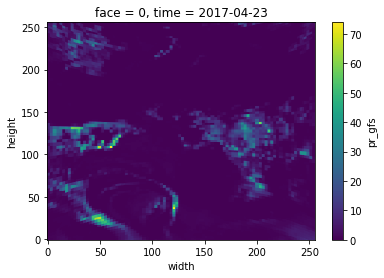

In [48]:
ds_remap.isel(face=0).isel(time=0).pr_gfs.plot()

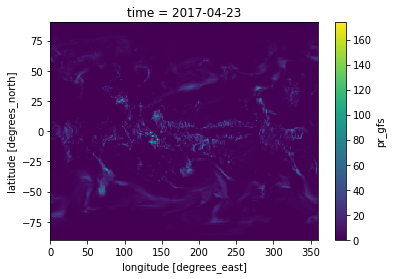

In [57]:
ds_iremap.isel(time=0).pr_gfs.plot()

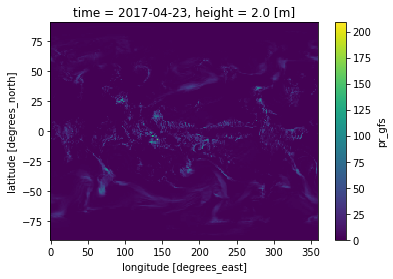

In [58]:
ds.isel(time=0).pr_gfs.plot()

In [160]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CubeSpherePadding2D(nn.Module):
    """
    Padding layer for 2D data on a cubed sphere. The requirements for using this layer are as follows:
    - The input data is 5-dimensional (batch, channels, height, width, 6)
    - Must follow "channels_first" order
    - The last dimension must have a length of 6 for the 6 faces of the cubed sphere
    - The last two faces (indices 4 and 5) are the polar faces

    Adapted from keras.layers.ZeroPadding3D by @jweyn

    # Arguments
        padding: int
        data_format: 'channels_first' or 'channels_last'
    """

    def __init__(self,
                 padding=(1, 1),
                 data_format='channels_first'):
        self.data_format = data_format
        # super(CubeSpherePadding2D, self).__init__(padding=padding,
        #                                           data_format=data_format)
        super(CubeSpherePadding2D, self).__init__()
        self.padding =  padding # ((0, 0),) + padding[1:]

    def forward(self, inputs):
        #p = self.padding[1][0]
        #print('start')
        p = self.padding[0]

        if self.data_format == 'channels_first':
            tr = (0, 1, 3, 2)

            # Pad the equatorial upper/lower boundaries and the polar upper/lower boundaries
            out = list()
            # Face 0
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 4, -p:, :],
                    inputs[:, :, 0],
                    inputs[:, :, 5, :p, :]
                ), dim=2), 2
            ))
            #print('test 1')
            # Face 1
            #print(inputs[:, :, 4, :, -p:].flip(dims=[2]).permute(*tr).shape, inputs[:, :, 1].shape, inputs[:, :, 5, :, -p:].flip(dims=[3]).permute(*tr).shape, inputs.shape)
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 4, :, -p:].flip(dims=[2]).permute(*tr),
                    inputs[:, :, 1],
                    inputs[:, :, 5, :, -p:].flip(dims=[3]).permute(*tr)
                ), dim=2), 2
            ))
            #print('test 3')
            # Face 2
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 4, :p].flip(dims=[2, 3]),
                    inputs[:, :, 2],
                    inputs[:, :, 5, -p:].flip(dims=[2, 3])
                ), dim=2), 2
            ))
            # Face 3
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 4, :, :p].flip(dims=[3]).permute(*tr),
                    inputs[:, :, 3],
                    inputs[:, :, 5, :, :p].flip(dims=[2]).permute(*tr)
                ), dim=2), 2
            ))
            # Face 4 (south pole)
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 2, :p].flip(dims=[2, 3]),
                    inputs[:, :, 4],
                    inputs[:, :, 0, :p, :]
                ), dim=2), 2
            ))
            # Face 5 (north pole)
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, :, 0, -p:, :],
                    inputs[:, :, 5],
                    inputs[:, :, 2, -p:].flip(dims=[2, 3])
                ), dim=2), 2
            ))
            #print('test 4')
            out1 = torch.cat(out, dim=2)
            del out
            #print('test 2')
            # Pad the equatorial periodic lateral boundaries and the polar left/right boundaries
            out = list()
            # Face 0
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, :, 3, :, -p:],
                    out1[:, :, 0],
                    out1[:, :, 1, :, :p]
                ), dim=3), 2
            ))
            # Face 1
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, :, 0, :, -p:],
                    out1[:, :, 1],
                    out1[:, :, 2, :, :p]
                ), dim=3), 2
            ))
            # Face 2
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, :, 1, :, -p:],
                    out1[:, :, 2],
                    out1[:, :, 3, :, :p]
                ), dim=3), 2
            ))
            # Face 3
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, :, 2, :, -p:],
                    out1[:, :, 3],
                    out1[:, :, 0, :, :p]
                ), dim=3), 2
            ))
            # Face 4
            out.append(torch.unsqueeze(
                torch.cat((
                    out[3][:, :, 0, p:2 * p, :].flip(dims=[2]).permute(*tr),
                    out1[:, :, 4],
                    out[1][:, :, 0, p:2 * p].flip(dims=[3]).permute(*tr)
                ), dim=3), 2
            ))
            # Face 5
            out.append(torch.unsqueeze(
                torch.cat((
                    out[3][:, :, 0, -2 * p:-p].flip(dims=[3]).permute(*tr),
                    out1[:, :, 5],
                    out[1][:, :, 0, -2 * p:-p, :].flip(dims=[2]).permute(*tr)
                ), dim=3), 2
            ))

            del out1
            outputs = torch.cat(out, dim=2)
            del out
            return outputs

        else:  # channels_last
            tr = (0, 2, 1, 3)
            # Pad the equatorial upper/lower boundaries and the polar upper/lower boundaries
            out = list()
            # Face 0
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 4, -p:, :],
                    inputs[:, 0],
                    inputs[:, 5, :p, :]
                ), dim=1), 1
            ))
            # Face 1
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 4, :, -p:].flip(dims=[2]).permute(*tr),
                    inputs[:, 1],
                    inputs[:, 5, :, -p:].flip(dims=[2]).permute(*tr)
                ), dim=1), 1
            ))
            # Face 2
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 4, :p].flip(dims=[1, 2]),
                    inputs[:, 2],
                    inputs[:, 5, -p:].flip(dims=[1, 2])
                ), dim=1), 1
            ))
            # Face 3
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 4, :, :p].flip(dims=[2]).permute(*tr),
                    inputs[:, 3],
                    inputs[:, 5, :, :p].flip(dims=[2]).permute(*tr)
                ), dim=1), 1
            ))
            # Face 4 (south pole)
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 2, :p].flip(dims=[1, 2]),
                    inputs[:, 4],
                    inputs[:, 0, :p, :]
                ), dim=1), 1
            ))
            # Face 5 (north pole)
            out.append(torch.unsqueeze(
                torch.cat((
                    inputs[:, 0, -p:, :],
                    inputs[:, 5],
                    inputs[:, 2, -p:].flip(dims=[1, 2])
                ), dim=1), 1
            ))

            out1 = torch.cat(out, dim=1)
            del out

            # Pad the equatorial periodic lateral boundaries and the polar left/right boundaries
            out = list()
            # Face 0
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, 3, :, -p:],
                    out1[:, 0],
                    out1[:, 1, :, :p]
                ), dim=2), 1
            ))
            # Face 1
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, 0, :, -p:],
                    out1[:, 1],
                    out1[:, 2, :, :p]
                ), dim=2), 1
            ))
            # Face 2
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, 1, :, -p:],
                    out1[:, 2],
                    out1[:, 3, :, :p]
                ), dim=2), 1
            ))
            # Face 3
            out.append(torch.unsqueeze(
                torch.cat((
                    out1[:, 2, :, -p:],
                    out1[:, 3],
                    out1[:, 0, :, :p]
                ), dim=2), 1
            ))
            # Face 4
            out.append(torch.unsqueeze(
                torch.cat((
                    out[3][:, 0, p:2 * p, :].flip(dims=[1]).permute(*tr),
                    out1[:, 4],
                    out[1][:, 0, p:2 * p, :].flip(dims=[1, 2]).permute(*tr)
                ), dim=2), 1
            ))
            # Face 5
            out.append(torch.unsqueeze(
                torch.cat((
                    out[3][:, 0, -2 * p:-p, :].flip(dims=[1, 2]).permute(*tr),
                    out1[:, 5],
                    out[1][:, 0, -2 * p:-p, :].flip(dims=[1]).permute(*tr)
                ), dim=2), 1
            ))

            del out1
            outputs = torch.cat(out, dim=1)
            del out
            return outputs

In [161]:
import torch
import torch.nn as nn
#from cube_sphere_padding_2d import CubeSpherePadding2D  # Assuming the class is in this file

# Define the size of your test tensor (batch_size, channels, faces, height, width)
tensor_size = (1, 3, 6, 10, 10)  # Example size

# Create a random tensor with the specified size
input_tensor = torch.randn(tensor_size)

# Initialize the CubeSpherePadding2D layer
# You can modify the padding and data_format as needed
padding_layer = CubeSpherePadding2D(padding=(1, 1), data_format='channels_first')

# Apply the padding to the input tensor
output_tensor = padding_layer(input_tensor)

# Print the shape of the input and output tensors to verify the padding
print("Input shape:", input_tensor.shape)
print("Output shape:", output_tensor.shape)

Input shape: torch.Size([1, 3, 6, 10, 10])
Output shape: torch.Size([1, 3, 6, 12, 12])


In [162]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CubeSphereConv2D(nn.Module):
    def __init__(self, in_channels, filters, kernel_size, strides=1, padding='valid', data_format='channels_first',
                 dilation_rate=1, activation=None, use_bias=True, flip_north_pole=True,
                 independent_north_pole=False):
        super(CubeSphereConv2D, self).__init__()

        # Store the parameters
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.data_format = data_format
        self.dilation_rate = dilation_rate
        self.activation = activation
        self.use_bias = use_bias
        self.flip_north_pole = flip_north_pole
        self.independent_north_pole = independent_north_pole

        # Define the convolutional layers
        self.equatorial_conv = nn.Conv2d(in_channels, filters, kernel_size, stride=strides,
                                         padding=0 if padding == 'valid' else kernel_size // 2,
                                         dilation=dilation_rate, bias=use_bias)
        self.polar_conv = nn.Conv2d(in_channels, filters, kernel_size, stride=strides,
                                    padding=0 if padding == 'valid' else kernel_size // 2,
                                    dilation=dilation_rate, bias=use_bias)

        if independent_north_pole:
            self.north_pole_conv = nn.Conv2d(in_channels, filters, kernel_size, stride=strides,
                                             padding=0 if padding == 'valid' else kernel_size // 2,
                                             dilation=dilation_rate, bias=use_bias)

        # Define activation function
        if activation is not None:
            self.activation = getattr(F, activation)
        else:
            self.activation = None

    def forward(self, x):
            # Adjust input based on data_format
            if self.data_format == 'channels_last':
                x = x.permute(0, 4, 1, 2, 3)

            # Initialize output list
            outputs = []
            #print('from inside cubesphereconv2d x.shape', x.shape)

            # Apply convolution to equatorial and polar faces
            for f in range(6):
                if f < 4:  # Equatorial faces
                    out = self.equatorial_conv(x[:, :, f, :, :])
                else:  # Polar faces
                    out = self.north_pole_conv(x[:, :, f, :, :]) if self.independent_north_pole and f == 5 else self.polar_conv(x[:, :, f, :, :])
                    if self.flip_north_pole and f == 5:
                        out = torch.flip(out, [2])  # Flip along the height dimension
                outputs.append(out.unsqueeze(2))

            # Stack outputs and reshape to maintain the face structure
            output = torch.cat(outputs, dim=2)
            batch_size, channels, _, height, width = output.shape
            output = output.reshape(batch_size, channels, 6, height, width)

            # Apply activation function if defined
            if self.activation is not None:
                output = self.activation(output)

            return output

In [163]:
def slice_tensor(x, start, end, step=None, axis=1):
    """
    Slice a tensor along a specified axis.

    :param x: Tensor to be sliced
    :param start: int - start index
    :param end: int - end index
    :param step: int or None - stepping parameter
    :param axis: int - axis along which to slice
    """
    slices = [slice(None)] * len(x.shape)
    slices[axis] = slice(start, end, step)
    return x[tuple(slices)]

In [164]:
def test_cube_sphere_conv2d():
    batch_size = 1
    num_channels = 3
    num_faces = 6
    height = 10
    width = 10
    filters = 10
    kernel_size = 3
    strides = 1
    padding = 'valid'
    dilation_rate = 1

    input_tensor = torch.rand(batch_size, num_channels, num_faces, height, width)
    conv_layer = CubeSphereConv2D(num_channels, filters, kernel_size, strides, padding, 'channels_first',
                                  dilation_rate, activation='relu', use_bias=True,
                                  flip_north_pole=True, independent_north_pole=False)


    output = conv_layer(input_tensor)

    if padding == 'valid':
        expected_height = (height - kernel_size) // strides + 1
        expected_width = (width - kernel_size) // strides + 1
    else:  # 'same' padding
        expected_height = height
        expected_width = width

    expected_shape = (batch_size, filters, num_faces, expected_height, expected_width)
    print(output.shape, expected_shape)
    assert output.shape == expected_shape, f"Output shape {output.shape} does not match the expected shape {expected_shape}"
test_cube_sphere_conv2d()

torch.Size([1, 10, 6, 8, 8]) (1, 10, 6, 8, 8)


In [165]:
base_filter_number = 16  # Example value, adjust as needed
cso = [6, 64, 64, 3]     # Example output shape, adjust as needed
integration_steps = 3    # Example value, adjust as needed
add_solar = False         # Example value, adjust as needed
skip_connections = 'unet'  # Example value, adjust as needed
insolation_shape = 10    # Example value, adjust as needed
batch_size = 1
channels = 3
height = 128
width = 128

batch_size = 1
num_channels = 3
num_faces = 6
# height = 10
# width = 10
filters = 10
kernel_size = 3
strides = 1
padding = 'valid'
dilation_rate = 1

cube_padding_1 = CubeSpherePadding2D((1,1), data_format='channels_first')
pooling_2 = nn.AvgPool3d((1, 2, 2))
up_sampling_2 = nn.Upsample(scale_factor=(1, 2, 2))
relu = nn.LeakyReLU(negative_slope=0.1)
# Define convolution layers
#conv_2d_1 = CubeSphereConv2D(base_filter_number, 3)

conv_2d_1 = CubeSphereConv2D(num_channels, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                  dilation_rate, activation=None, use_bias=True,
                                  flip_north_pole=True, independent_north_pole=False)

conv_2d_1_2 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                  dilation_rate, activation=None, use_bias=True,
                                  flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
conv_2d_1_3 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
conv_2d_2 = CubeSphereConv2D(base_filter_number, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
conv_2d_2_2 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
conv_2d_2_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
conv_2d_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
conv_2d_3_2 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
conv_2d_4 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4 if skip_connections else base_filter_number * 8, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4 if skip_connections else base_filter_number * 8, 3)
conv_2d_4_2 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 8, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 8, 3)
conv_2d_5 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 2 if skip_connections else base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2 if skip_connections else base_filter_number * 4, 3)
conv_2d_5_2 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
conv_2d_5_3 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
conv_2d_6 = CubeSphereConv2D(base_filter_number * 2, base_filter_number if skip_connections else base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number if skip_connections else base_filter_number * 2, 3)
conv_2d_6_2 = CubeSphereConv2D(base_filter_number*4 if skip_connections else base_filter_number * 8, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
conv_2d_6_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
conv_2d_7 = CubeSphereConv2D(base_filter_number*2 if skip_connections else base_filter_number * 4, base_filter_number, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
conv_2d_7_2 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
conv_2d_7_3 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
#         self.conv_2d_8 = CubeSphereConv2D(cso[-1], 1)  # Output layer


conv_2d_8 = CubeSphereConv2D(base_filter_number, cso[-1], 1, strides, padding, 'channels_first',
                            dilation_rate, activation=None, use_bias=True,
                            flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(cso[-1], 1)

x = torch.randn(batch_size, channels, 6, height, width)
print(x.shape)

x0 = cube_padding_1(x)
print(x0.shape)
x0 = relu(conv_2d_1(x0))
print(x0.shape)


x0 = cube_padding_1(x0)
print(x0.shape)
x0 = relu(conv_2d_1_2(x0))
print(x0.shape)


x1 = pooling_2(x0)
x1 = cube_padding_1(x1)
x1 = relu(conv_2d_2(x1))
x1 = cube_padding_1(x1)
x1 = relu(conv_2d_2_2(x1))

print(x1.shape)
x2 = pooling_2(x1)
x2 = cube_padding_1(x2)
x2 = relu(conv_2d_5_2(x2))
x2 = cube_padding_1(x2)
x2 = relu(conv_2d_5(x2))
x2 = up_sampling_2(x2)

print(x2.shape)
# # For concatenation in PyTorch, ensure dimensions match
x = torch.cat([x2, x1], dim=1)  # Adjust 'dim' if needed
print(x.shape)
x = cube_padding_1(x)
x = relu(conv_2d_6_2(x))
print(x.shape)
x = cube_padding_1(x)
x = relu(conv_2d_6(x))
print(x.shape)
x = up_sampling_2(x)
print(x.shape)
# Another concatenation
x = torch.cat([x, x0], dim=1)  # Adjust 'dim' if needed
print(x.shape)
x = cube_padding_1(x)
x = relu(conv_2d_7(x))
print(x.shape)
x = cube_padding_1(x)
x = relu(conv_2d_7_2(x))
print(x.shape)
x = conv_2d_8(x)  # Final convolution layer
print(x.shape)

torch.Size([1, 3, 6, 128, 128])
torch.Size([1, 3, 6, 130, 130])
torch.Size([1, 16, 6, 128, 128])
torch.Size([1, 16, 6, 130, 130])
torch.Size([1, 16, 6, 128, 128])
torch.Size([1, 32, 6, 64, 64])
torch.Size([1, 32, 6, 64, 64])
torch.Size([1, 64, 6, 64, 64])
torch.Size([1, 32, 6, 64, 64])
torch.Size([1, 16, 6, 64, 64])
torch.Size([1, 16, 6, 128, 128])
torch.Size([1, 32, 6, 128, 128])
torch.Size([1, 16, 6, 128, 128])
torch.Size([1, 16, 6, 128, 128])
torch.Size([1, 3, 6, 128, 128])


In [166]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class CubeSphereModel(nn.Module):
    def __init__(self, in_channels, base_filter_number, cso, integration_steps,  skip_connections, kernel_size, strides, padding, dilation_rate):
        super(CubeSphereModel, self).__init__()
#         self.add_solar = add_solar
        self.skip_connections = skip_connections.lower() == 'unet'

        # Define layers
        self.cube_padding_1 = CubeSpherePadding2D((1,1), data_format='channels_first')
        self.pooling_2 = nn.AvgPool3d((1, 2, 2))
        self.up_sampling_2 = nn.Upsample(scale_factor=(1, 2, 2))
        self.relu = nn.LeakyReLU(negative_slope=0.1)

        self.conv_2d_1 = CubeSphereConv2D(in_channels, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                        dilation_rate, activation=None, use_bias=True,
                                        flip_north_pole=True, independent_north_pole=False)

        self.conv_2d_1_2 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                        dilation_rate, activation=None, use_bias=True,
                                        flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
        self.conv_2d_1_3 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
        self.conv_2d_2 = CubeSphereConv2D(base_filter_number, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
        self.conv_2d_2_2 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
        self.conv_2d_2_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
        self.conv_2d_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
        self.conv_2d_3_2 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
        self.conv_2d_4 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4 if skip_connections else base_filter_number * 8, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4 if skip_connections else base_filter_number * 8, 3)
        self.conv_2d_4_2 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 8, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 8, 3)
        self.conv_2d_5 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 2 if skip_connections else base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2 if skip_connections else base_filter_number * 4, 3)
        self.conv_2d_5_2 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
        self.conv_2d_5_3 = CubeSphereConv2D(base_filter_number * 4, base_filter_number * 4, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 4, 3)
        self.conv_2d_6 = CubeSphereConv2D(base_filter_number * 2, base_filter_number if skip_connections else base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number if skip_connections else base_filter_number * 2, 3)
        self.conv_2d_6_2 = CubeSphereConv2D(base_filter_number*4 if skip_connections else base_filter_number * 8, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
        self.conv_2d_6_3 = CubeSphereConv2D(base_filter_number * 2, base_filter_number * 2, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number * 2, 3)
        self.conv_2d_7 = CubeSphereConv2D(base_filter_number*2 if skip_connections else base_filter_number * 4, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
        self.conv_2d_7_2 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
        self.conv_2d_7_3 = CubeSphereConv2D(base_filter_number, base_filter_number, kernel_size, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(base_filter_number, 3)
        #         self.conv_2d_8 = CubeSphereConv2D(cso[-1], 1)  # Output layer


        self.conv_2d_8 = CubeSphereConv2D(base_filter_number, cso[-1], 1, strides, padding, 'channels_first',
                                    dilation_rate, activation=None, use_bias=True,
                                    flip_north_pole=True, independent_north_pole=False)#CubeSphereConv2D(cso[-1], 1)



#         if add_solar:
#             self.solar_inputs = nn.ModuleList([nn.Linear(generator.insolation_shape, base_filter_number) for _ in range(1, integration_steps)])

    #def forward(self, x):
    def forward(self, x):
        # Apply layers as per your provided structure
        x0 = self.cube_padding_1(x)
        #print(x0.shape)
        x0 = self.relu(self.conv_2d_1(x0))
        #print(x0.shape)
        x0 = self.cube_padding_1(x0)
        x0 = self.relu(self.conv_2d_1_2(x0))

        x1 = self.pooling_2(x0)
        x1 = self.cube_padding_1(x1)
        x1 = self.relu(self.conv_2d_2(x1))
        x1 = self.cube_padding_1(x1)
        x1 = self.relu(self.conv_2d_2_2(x1))

        x2 = self.pooling_2(x1)
        x2 = self.cube_padding_1(x2)
        x2 = self.relu(self.conv_2d_5_2(x2))
        x2 = self.cube_padding_1(x2)
        x2 = self.relu(self.conv_2d_5(x2))
        x2 = self.up_sampling_2(x2)

        # For concatenation in PyTorch, ensure dimensions match
        x = torch.cat([x2, x1], dim=1)  # Adjust 'dim' if needed

        x = self.cube_padding_1(x)
        x = self.relu(self.conv_2d_6_2(x))
        x = self.cube_padding_1(x)
        x = self.relu(self.conv_2d_6(x))
        x = self.up_sampling_2(x)

        # Another concatenation
        x = torch.cat([x, x0], dim=1)  # Adjust 'dim' if needed

        x = self.cube_padding_1(x)
        x = self.relu(self.conv_2d_7(x))
        x = self.cube_padding_1(x)
        x = self.relu(self.conv_2d_7_2(x))
        x = self.conv_2d_8(x)  # Final convolution layer

#         # If add_solar is True, handle solar_data
#         if self.add_solar and solar_data is not None:
#             # Example of processing solar_data
#             # Adjust this part according to how you want to integrate solar_data into your model
#             for solar_input, solar in zip(self.solar_inputs, solar_data):
#                 solar_processed = solar_input(solar)
#                 x = x + solar_processed  # Example of combining solar data with main input


        return x

In [167]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# [Include the CubeSphereConv2D, CubeSpherePadding2D, and CubeSphereModel class definitions here]

def test_cube_sphere_model():
    # Test parameters
    base_filter_number = 16
    integration_steps = 3
    skip_connections = 'unet'
    kernel_size = 3
    strides = 1
    padding = 'valid'
    dilation_rate = 1
    cso = [6, 64, 64, 3]  # Example output shape

    # Input tensor dimensions
    batch_size = 1
    channels = 6
    num_faces = 6
    height = 128
    width = 128

    # Initialize the model
    model = CubeSphereModel(channels, base_filter_number, cso, integration_steps, skip_connections, kernel_size, strides, padding, dilation_rate)
    

    # Create a test input tensor
    x = torch.randn(batch_size, channels, num_faces, height, width)

    # Forward pass
    output = model(x)

    # Expected output shape
    expected_output_shape = (batch_size, cso[-1], num_faces, height, width)  # Adjust based on model's operations
    print('output.shape ', output.shape)
    assert output.shape == expected_output_shape, f"Output shape mismatch: expected {expected_output_shape}, got {output.shape}"

    print("Test passed. Output shape is as expected.")

# Run the test
test_cube_sphere_model()

output.shape  torch.Size([1, 3, 6, 128, 128])
Test passed. Output shape is as expected.


In [168]:
base_filter_number = 16
integration_steps = 3
skip_connections = 'unet'
kernel_size = 3
strides = 1
padding = 'valid'
dilation_rate = 1
cso = [6, 64, 64, 3]  

# Input tensor dimensions
batch_size = 1
channels = 6
num_faces = 6
height = 256
width = 256

# Initialize the model
model = CubeSphereModel(channels, base_filter_number, cso, integration_steps, skip_connections, kernel_size, strides, padding, dilation_rate)


In [169]:
print(model)

CubeSphereModel(
  (cube_padding_1): CubeSpherePadding2D()
  (pooling_2): AvgPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0)
  (up_sampling_2): Upsample(scale_factor=(1.0, 2.0, 2.0), mode=nearest)
  (relu): LeakyReLU(negative_slope=0.1)
  (conv_2d_1): CubeSphereConv2D(
    (equatorial_conv): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (polar_conv): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv_2d_1_2): CubeSphereConv2D(
    (equatorial_conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (polar_conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv_2d_1_3): CubeSphereConv2D(
    (equatorial_conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
    (polar_conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv_2d_2): CubeSphereConv2D(
    (equatorial_conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (polar_conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  )
  (conv_2d_2_2): CubeSphereConv2D(
   

In [170]:
from tqdm import tqdm

data_prep = False
if data_prep:
    tas_gfs_ = []
    pr_gfs_  = []
    pr_gpcp_ = []


    input_file = path+'deepnwp_2017_04_22_12.nc'
    output_file = input_file[:-3]+'_cs.nc' #path+'deepnwp_2017_04_22_12_cs.nc'
    !rm -rf {output_file}  temp.nc

    csr.remap(input_file, 'temp.nc',)
    csr.convert_to_faces('temp.nc', 
                         output_file,
                         coord_file=input_file)
    ds_remap = xr.open_dataset(output_file)
    print(ds_remap.tas_gfs.values.shape, ds_remap.pr_gfs.values.shape, ds_remap.pr_gpcp.values.shape) 

    import glob
    # Define the pattern to match the filenames
    pattern = path+'deepnwp_????_??_??_??.nc'

    # Use glob.glob to find all files matching the pattern
    filenames = glob.glob(pattern)

    # Loop over the found files
    for filename in tqdm(filenames):
        #print(filename)
        input_file = filename
        output_file = input_file[:-3]+'_cs.nc' #path+'deepnwp_2017_04_22_12_cs.nc'
        !rm -rf {output_file}  temp.nc

        csr.remap(input_file, 'temp.nc',)
        csr.convert_to_faces('temp.nc', 
                             output_file,
                             coord_file=input_file)
        ds_remap = xr.open_dataset(output_file)

        tas_gfs_.append(ds_remap.tas_gfs.values)
        pr_gfs_.append(ds_remap.pr_gfs.values)
        pr_gpcp_.append(ds_remap.pr_gpcp.values)

    tas_gfs_input = np.array(tas_gfs_)
    pr_gfs_input = np.array(pr_gfs_)
    pr_gpcp_input = np.array(pr_gpcp_)    
    print(tas_gfs_input.shape, pr_gfs_input.shape, pr_gpcp_input.shape)

In [171]:
# Concatenate arrays along the second dimension (dimension index 1)
concatenated_array = np.concatenate((tas_gfs_input, pr_gfs_input), axis=1)

# Convert to PyTorch tensor
input_tensor = torch.tensor(concatenated_array)
output_tensor = torch.tensor(pr_gpcp_input)

In [172]:
print(input_tensor.shape, output_tensor.shape)

torch.Size([2676, 6, 6, 256, 256]) torch.Size([2676, 3, 6, 256, 256])


In [173]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class deepnwpDataset(Dataset):
    def __init__(self, inputs, outputs):
        # Assuming inputs and outputs are numpy arrays or PyTorch tensors of the same shape
        self.inputs = inputs
        self.outputs = outputs

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_sample = self.inputs[idx]
        output_sample = self.outputs[idx]
        return input_sample, output_sample
    
dataset = deepnwpDataset(input_tensor, output_tensor)

# Define the sizes for train, validation, and test sets
total_size = len(dataset)
train_size = int(0.7 * total_size)  # 70% for training
val_size = int(0.15 * total_size)   # 15% for validation
test_size = total_size - train_size - val_size  # Remaining for test

# Split the dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# You can then create DataLoader instances for each set if needed
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Use the DataLoader in your training loop
for inputs, outputs in train_loader:
    print(inputs.shape, outputs.shape)
    break


torch.Size([32, 6, 6, 256, 256]) torch.Size([32, 3, 6, 256, 256])


In [174]:
base_filter_number = 16
integration_steps = 3
skip_connections = 'unet'
kernel_size = 3
strides = 1
padding = 'valid'
dilation_rate = 1
cso = [6, 64, 64, 3]  

# Input tensor dimensions
batch_size = 1
channels = 6
num_faces = 6
height = 256
width = 256

# Initialize the model
model = CubeSphereModel(channels, base_filter_number, cso, integration_steps, skip_connections, kernel_size, strides, padding, dilation_rate)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define the loss function (MSE for regression tasks)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation data loaders
# train_loader and val_loader should be defined

epochs = 2000  # Adjust as needed

# Training loop
for epoch in tqdm(range(epochs)):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Compute validation loss
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No gradient computation in validation phase
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item()

    # Print training and validation loss
    print(f'Epoch {epoch+1} - Training Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}')

    # Save the model every 500 epochs
    if (epoch + 1) % 500 == 0:
        torch.save(model.state_dict(), f'model_epoch_{epoch+1}.pth')
        print(f'Model saved at epoch {epoch+1}')

print('Finished Training')


  0%|                                                                                                                                                | 0/2000 [00:00<?, ?it/s]